In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
BASE_DIR='/content/drive/MyDrive/datasets'

In [5]:
!sudo apt install tesseract-ocr
!pip install pytesseract

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 18 not upgraded.
Need to get 4,816 kB of archives.
After this operation, 15.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-eng all 1:4.00~git30-7274cfa-1.1 [1,591 kB]
Get:2 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr-osd all 1:4.00~git30-7274cfa-1.1 [2,990 kB]
Get:3 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tesseract-ocr amd64 4.1.1-2.1build1 [236 kB]
Fetched 4,816 kB in 1s (4,701 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debc

In [9]:
import cv2
import numpy as np
import pytesseract
import matplotlib.pyplot as plt

In [11]:
# Load image
img = cv2.imread('/content/drive/MyDrive/dataset/img1.jpg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img2.JPG')
# img = cv2.imread('/content/drive/MyDrive/datasets/img3.jpg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img4.jpg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img5b.png')
# img = cv2.imread('/content/drive/MyDrive/datasets/img6.jpg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img7.jpg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img9c.jpg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img28.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img29.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img27p.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img31p.png')
# img = cv2.imread('/content/drive/MyDrive/datasets/img33.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img35bike.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img24c.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img20c.png')
# img = cv2.imread('/content/drive/MyDrive/datasets/img21p.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img29p.png')
# img = cv2.imread('/content/drive/MyDrive/datasets/img37.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img42g.png')
# img = cv2.imread('/content/drive/MyDrive/datasets/img44db.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img51.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img52.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img53.jpeg')
#img = cv2.imread('/content/drive/MyDrive/datasets/img54mirror.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img59.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img60l.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img63.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img65l.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img66.png')
# img = cv2.imread('/content/drive/MyDrive/datasets/img67.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img71.jpeg')
# img = cv2.imread('/content/drive/MyDrive/datasets/img81s.png')

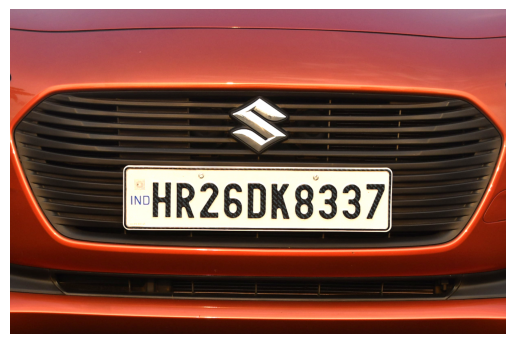

In [12]:
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [14]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

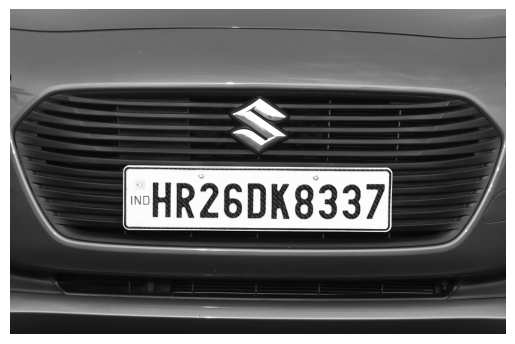

In [15]:
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [16]:
thresh = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

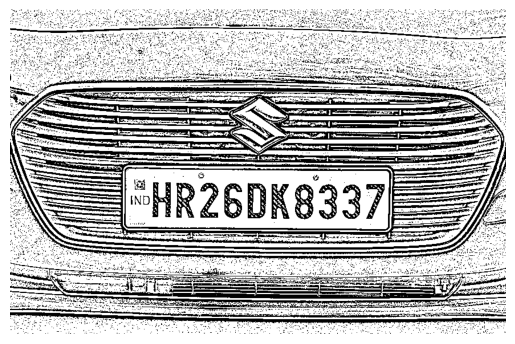

In [17]:
plt.imshow(cv2.cvtColor(thresh, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [18]:
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (3, 3))
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations=1)

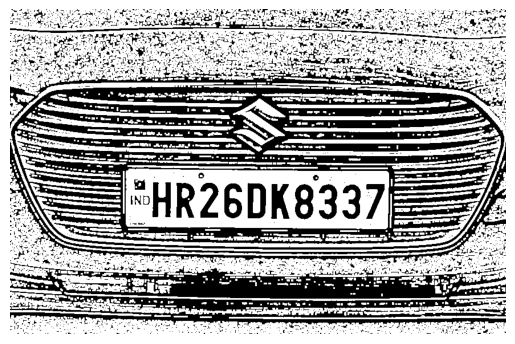

In [19]:
plt.imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [20]:
contours , hierarchy = cv2.findContours(opening, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [21]:
image_contours = cv2.drawContours(img.copy(), contours, -1, (0, 255, 0), 2)

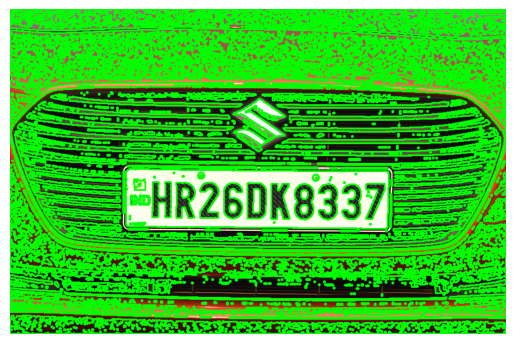

In [22]:
plt.imshow(cv2.cvtColor(image_contours, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

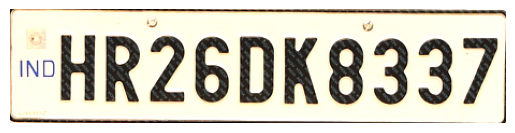

HR26DK8337



In [23]:
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    if w*h > 1000:  # Filter out small contours
        roi = img[y:y+h, x:x+w]
        gray_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2GRAY)
        _, thresh_roi = cv2.threshold(gray_roi, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)
        angle = 0
        minLineLength = 100
        maxLineGap = 10
        lines = cv2.HoughLinesP(thresh_roi, 1, np.pi/180, 100, minLineLength, maxLineGap)
        if lines is not None:
            for line in lines:
                x1, y1, x2, y2 = line[0]
                if abs(y2-y1) > 10:  # Filter out horizontal lines
                    angle = np.arctan2(y2-y1, x2-x1)*180/np.pi
                    break
        rotated = cv2.rotate(roi, cv2.ROTATE_90_CLOCKWISE) if angle < -45 else roi
        text = pytesseract.image_to_string(rotated, lang='eng')
        if(len(text)>=6 and len(text)<=20):
          plt.imshow(cv2.cvtColor(roi, cv2.COLOR_BGR2RGB))
          plt.axis('off')
          plt.show()
          print(text)
          break